In [1]:
import numpy as np
from scipy.integrate import odeint
from scipy.fftpack import diff as psdiff

import matplotlib.pyplot as plt

def plot_solution(x, t, predictions, size=(10, 5), show=True, save=False, path=None, name=None, dpi=300):
    X, T = np.meshgrid(x, t)
    fig = plt.figure(figsize=size)

    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.plot_surface(X, T, predictions, cmap='viridis')
    ax.set_xlabel('x')
    ax.set_ylabel('t')

    ax = fig.add_subplot(1, 2, 2)
    ax.imshow(predictions, origin='lower', aspect='auto', cmap='viridis', 
              extent=[x.min(), x.max(), t.min(), t.max()])
    ax.set_xlabel('x')
    ax.set_ylabel('t')

    plt.tight_layout()
    
    if save:
        plt.savefig(f'{path}/{name}.png', dpi=dpi)
    
    if show:
        plt.show()
    else:
        plt.close()

In [2]:
def kdv_exact(x, c):
    """Profile of the exact solution to the KdV for a single soliton on the real line."""
    u = 0.5*c*np.cosh(0.5*np.sqrt(c)*x)**(-2)
    return u

def kdv(u, t, L):
    """Differential equations for the KdV equation, discretized in x."""
    # Compute the x derivatives using the pseudo-spectral method.
    ux = psdiff(u, period=L)
    uxxx = psdiff(u, period=L, order=3)

    # Compute du/dt.    
    dudt = -6*u*ux - uxxx

    return dudt

def kdv_solution(u0, t, L):
    """Use odeint to solve the KdV equation on a periodic domain.
    
    `u0` is initial condition, `t` is the array of time values at which
    the solution is to be computed, and `L` is the length of the periodic
    domain."""

    sol = odeint(kdv, u0, t, args=(L,), mxstep=5000)
    return sol

Computing the solution.


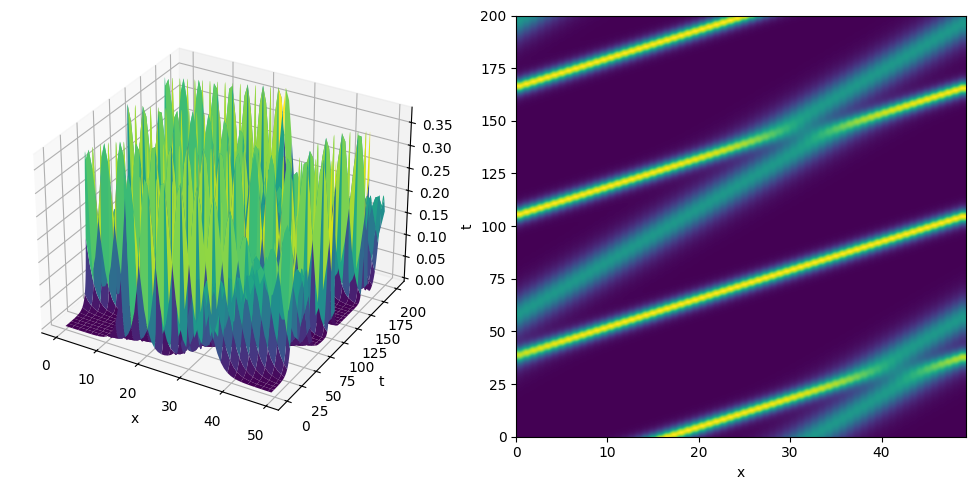

In [10]:
# Set the size of the domain, and create the discretized grid.
L = 50.0
N = 64
dx = L / (N - 1.0)
x = np.linspace(0, (1-1.0/N)*L, N)

# Set the initial conditions.
# Not exact for two solitons on a periodic domain, but close enough...
u0 = kdv_exact(x-0.33*L, 0.75) + kdv_exact(x-0.65*L, 0.4)

# Set the time sample grid.
T = 200
t = np.linspace(0, T, 501)

print("Computing the solution.")
sol = kdv_solution(u0, t, L)

plot_solution(x, t, sol)